# Multi-Layer Perceptron / Feed Forward Architecture

## Implementing a 3 Layer Neural Network From Scratch

<img src="Dataset/Images/neural_net.gif"
     alt="Perceptron"
     style="width: 450px;" />


### Learning Goals (Theory + Implementation)

 - Understanding the Multilayer Perceptron (MLP) Architecture
 - Understanding Forward Propagation & Backpropagation, Loss & Activation
 - Making Predictions 
 - Checking Classification Performance on Different Datasets
 - Classification Project

# Part -I Neural Architecture



### **One Layer Network** 
<img src="Dataset/Images/Perceptron.png"
     alt="Perceptron"
     style="width: 650px; height: 350px" />
     
- Simplest Unit Perceptron
- Only One Output Unit
- No Hidden Units
- Input is Not Counted in Layers



### **Two Layer Network** 
<img src="Dataset/Images/one_white.jpg"
     alt="Perceptron"
     style="width: 450px; height: 300px;" />

- Two Layers : 1 Hidden + 1 Output
- Multi-Layer Perceptron or Feed Forward Net or Deep Forward Net


### **Three Layer Network** 
<img src="Dataset/Images/two_white.jpg"
     alt="Perceptron"
     style="width: 450px; height: 300px;" />

- Three Layers : 2 Hidden + 1 Output
- Multi-Layer Perceptron/Feed Forward Net/Deep Forward Net

### Part-1 Implementation ( 3 Layer MLP )

### Part-2 Understanding Forward Propagation

 - How To Pass One Example ?
 - How To Pass Multiple Examples (Vectorization) ?
 
### Part-3 Backpropagation Algorithm!
#### Building a Multi-layer neural network from scratch

 - One of the Most Difficult/Trickiest Things in ML to Get Right.
 
 <img src="Dataset/Images/1-1.gif"
     alt="Perceptron"
     style="width: 550px;" />

- Quite Mathematical, Challenging to Understand
- **Good Thing** - As a deep learning engineer, you never have to implement backpropagation from scratch....

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_classification
from visualize import plot_decision_boundary

In [2]:
# Model Parameters

input_size = 2  # no_of_features
layers = [4, 3] # no_of_neurons in 1st and 2nd layer (Hidden Layers)
output_size = 2 # no_of_neurons in output layer

In [3]:
def softmax(a): # a -> Vector
    
    e_pa = np.exp(a) # Vector
    ans = e_pa/np.sum(e_pa, axis=1, keepdims=True)
    
    return ans

# Example - 1 (Use of axis and keepdims in Numpy)
# a = np.array([[5,1,2],[6,1,2]])
# print(np.sum(a))
# print(np.sum(a, axis=1))
# print(np.sum(a, axis=1, keepdims=True))

# Example - 2 (Testing Softmax Function)
# a = np.array([[10, 10], [10, 20]])
# a_ = softmax(a)
# print(a_)

In [4]:
class NeuralNetwork():
    
    def __init__(self, input_size, layers, output_size):
        
        np.random.seed(0) # Every Time You Init. Weights, You Can Reproduce Same Results
        
        model = {} # dictionary
        
        # First Layer / First Hidden Layer
        model['W1'] = np.random.randn(input_size, layers[0])  # Init. Weights for 1st Layer (1st Hidden Layer)
        model['b1'] = np.zeros((1, layers[0]))   # Init. Biases for 1st Layer (1st Hidden Layer)
        
        # Second Layer / Second Hidden Layer
        model['W2'] = np.random.randn(layers[0], layers[1])   # Init. Weights for 2nd Layer (2nd Hidden Layer)
        model['b2'] = np.zeros((1, layers[1]))   # Init. Biases for 2nd Layer (2nd Hidden Layer)
        
        # Third Layer / Output Layer
        model['W3'] = np.random.randn(layers[1], output_size) # Init. Weights for 3rd Layer (Output Layer)
        model['b3'] = np.zeros((1, output_size)) # Init. Biases for 3rd Layer (Output Layer)
        
        self.model = model
        
    def forward(self, x):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        
        return y_
        
    def backward(self, x, y, learning_rate=0.001):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        m = x.shape[0]

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2)) * np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1)) * np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update The Model Parameters Using Gradient Descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, x):
        
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1 : ", W1.shape)
        print("A1 : ", a1.shape)
        
        print("W2 : ", W2.shape)
        print("A2 : ", a2.shape)
        
        print("W3 : ", W3.shape)
        print("Y_ : ", y_.shape)

In [5]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [6]:
def one_hot(y, depth):
    # depth -> No. Of Classes
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    
    return y_oht

#### Generate Dataset

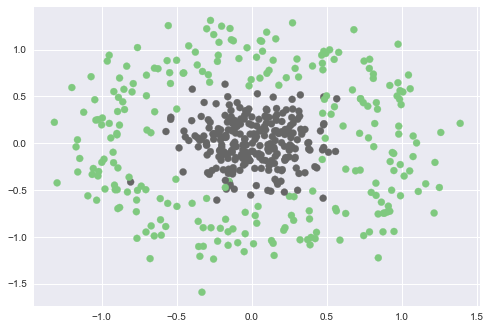

In [7]:
X, Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

### Training Our Model

In [8]:
def train(X, Y, model, epochs, learning_rate, logs=True):
    
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        training_loss.append(l)
        model.backward(X, Y_OHT, learning_rate)
        
        if(logs):
            print("Epoch %d : Loss %.4f"%(ix, l))
            
    return training_loss

In [9]:
model = NeuralNetwork(input_size=2, layers=[10, 5], output_size=2)

In [10]:
losses = train(X, Y, model, epochs=500, learning_rate=0.001, logs=False)

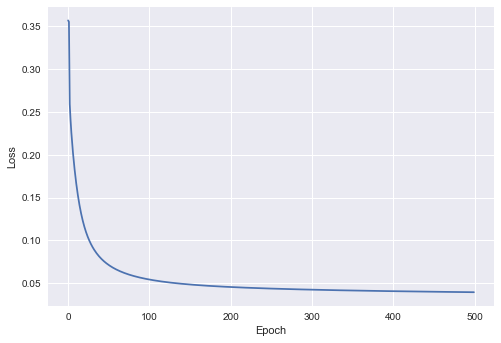

In [11]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Visualisation

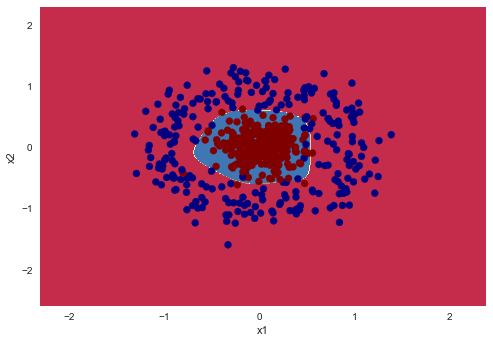

In [12]:
plot_decision_boundary(lambda x:model.predict(x), X, Y)

### Accuracy

In [13]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy : ", training_accuracy*100, "%")

Training Accuracy :  97.0 %


## Testing On Other Non-Linear Datasets

### 1. XOR Dataset

In [14]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [15]:
model_xor = NeuralNetwork(input_size=2, layers=[10, 5], output_size=2)
losses = train(X, Y, model_xor, 500, 0.01, logs=False)

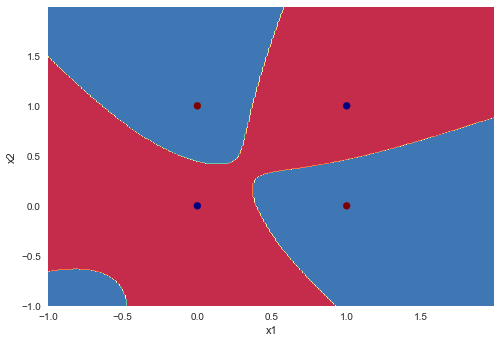

In [16]:
plot_decision_boundary(lambda x:model_xor.predict(x), X, Y)

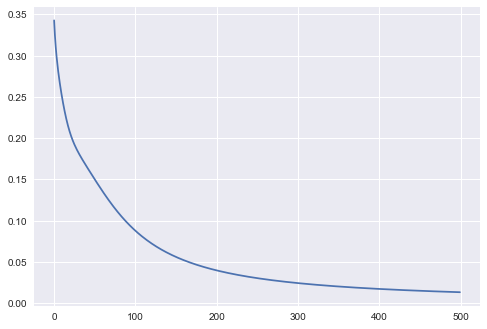

In [17]:
plt.plot(losses)
plt.show()

### 2. Some Other Datasets

In [18]:
def load_dataset(dataset):
    
    if dataset=="moons":
        X, Y = make_moons(n_samples=500, noise=0.2, random_state=1)
    elif dataset=="circles":
        X, Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=="classification":
        X, Y = make_classification(n_samples=500, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=1)
    else:
        # Create XOR Dataset
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([0,1,1,0])
        
    return X, Y

Dataset :  xor
Training Accuracy = 1.0000


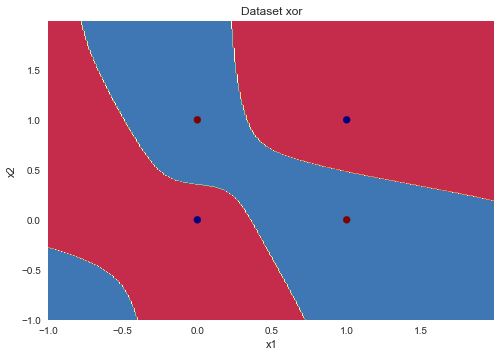

Dataset :  classification
Training Accuracy = 0.9560


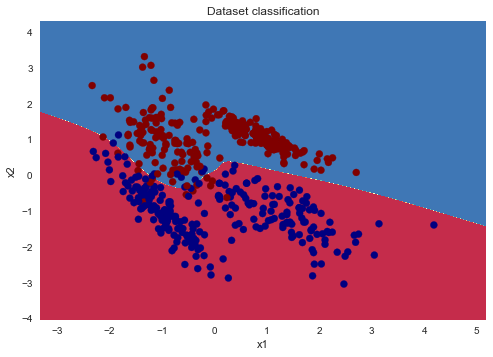

Dataset :  moons
Training Accuracy = 0.9720


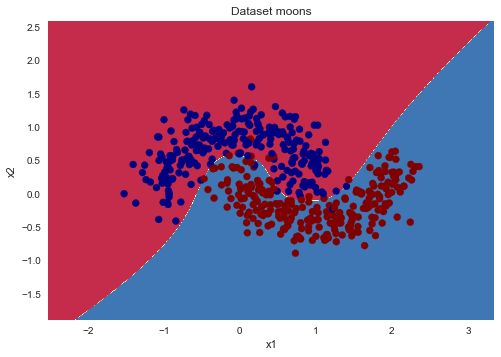

Dataset :  circles
Training Accuracy = 0.9700


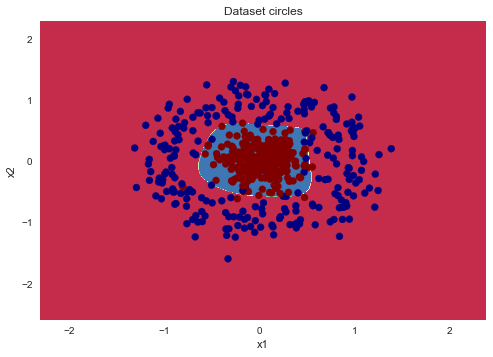

In [19]:
datasets = ["xor", "classification", "moons", "circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2, layers=[8, 4], output_size=2)
    X, Y = load_dataset(d)
    losses = train(X, Y, model, 1000, 0.001, logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Dataset : ", d)
    print("Training Accuracy = %.4f"%training_accuracy)
    
    # plt.plot(losses)
    # plt.title("Dataset " + d)
    # plt.xlabel("Epoch")
    # plt.ylabel("Loss")
    # plt.show()
    
    plt.title("Dataset " + d)
    plot_decision_boundary(lambda x:model.predict(x), X, Y)
    plt.show()